In [1]:
from qiskit import *

In [2]:
from math import pi
state_package = QuantumRegister(1)
alice = QuantumRegister(1)
bob = QuantumRegister(1)
output = ClassicalRegister(3)
circuit = QuantumCircuit(state_package,alice,bob,output)

In [3]:
circuit.rx(pi/8, state_package)
circuit.barrier()

In [4]:
circuit.h(alice)
circuit.cx(alice,bob)
circuit.barrier()

In [5]:
circuit.cx(state_package,alice)
circuit.h(state_package)
circuit.barrier()

In [6]:
circuit.measure([state_package[0],alice[0]],[output[0],output[1]])
circuit.barrier()

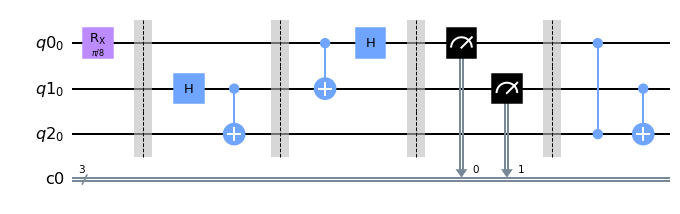

In [7]:
circuit.cz(state_package,bob)
circuit.cx(alice,bob)
circuit.draw('mpl')

In [8]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [9]:
provider = IBMQ.get_provider('ibm-q')
qcomp = provider.get_backend('ibmq_16_melbourne')
job = execute(circuit, backend=qcomp)
from qiskit.tools.monitor import job_monitor
job_monitor(job)

Job Status: job has successfully run


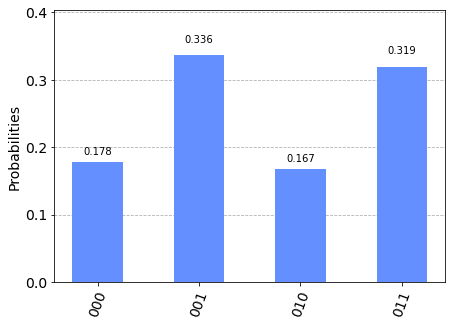

In [11]:
from qiskit.tools.visualization import plot_histogram
result = job.result()
plot_histogram(result.get_counts(circuit))